## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [4]:
bike.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## NOW WE CAN EXPLORE OUR FEATURES. FIRST LETS EXPLORE THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES LIKE weather , season.

In [8]:
bike.season.value_counts() #considering the season

3    188
2    184
1    180
4    178
Name: season, dtype: int64

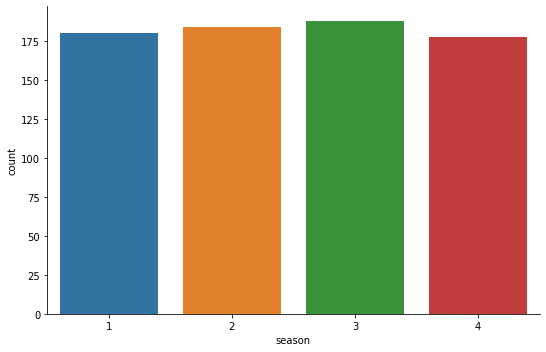

In [10]:
#sns.factorplot
sns.factorplot(x='season',data=bike,kind='count',size=5,aspect=1.5)

1-> spring//
2-> summer//
3-> fall//
4-> winter

In [11]:
#Checking Correlation between temp and atemp as they look mostly similar
bike['temp'].corr(bike['atemp'])
#Since both the columns are highly related, We can drop one of them.

0.9916961786905648

Accoriding to Data dictionary, column 'temp' represents actual temperature while column 'atemp' is actual temperature what customer might feel. Since we are predicting customer response, It seems logical to keep 'atemp' than 'temp'

In [12]:
#Dropping column 'temp'
inp1=bike.drop({'temp'},axis='columns')
inp1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#Keeping original data intact and Dropping Columns 'Instant' and 'dteday' in new dataframe
inp1=inp1.drop({'instant','dteday'},axis='columns')
inp1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,82,1518,1600


### Since it is Prediction of Bike Rental Daily count based on environmental and Seasonal settings, The count of casual and registered users or classification based on kind of users is out of scope.

In [14]:
# Dropping Casual and  Registered columns:-
inp1=inp1.drop({'casual','registered'},axis='columns')


In [15]:
# To check the remaining columns
inp1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

NOW WE CAN ALSO SEE DISTRIBUTION OF CONTINOUS VARIABLES.

In [16]:
# Checking distribution of Data in each newly formed column
inp1.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,8714.000000


In [17]:
#weather
inp1.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

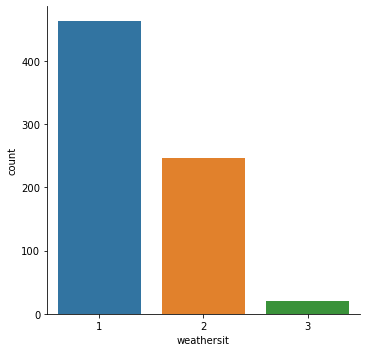

In [18]:
sns.factorplot(x='weathersit',data= inp1,kind='count',size=5,aspect=1) 

weathersit -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


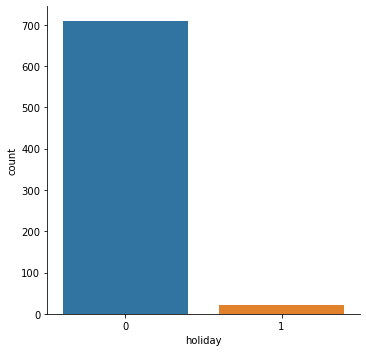

In [19]:
#holiday
inp1.holiday.value_counts()
sns.factorplot(x='holiday',data=inp1,kind='count',size=5,aspect=1) 
# majority of data is for non holiday days.

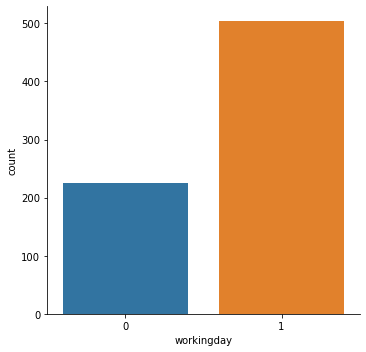

In [20]:
inp1.workingday.value_counts()
sns.factorplot(x='workingday',data=inp1,kind='count',size=5,aspect=1) 
# majority of data is for working days.

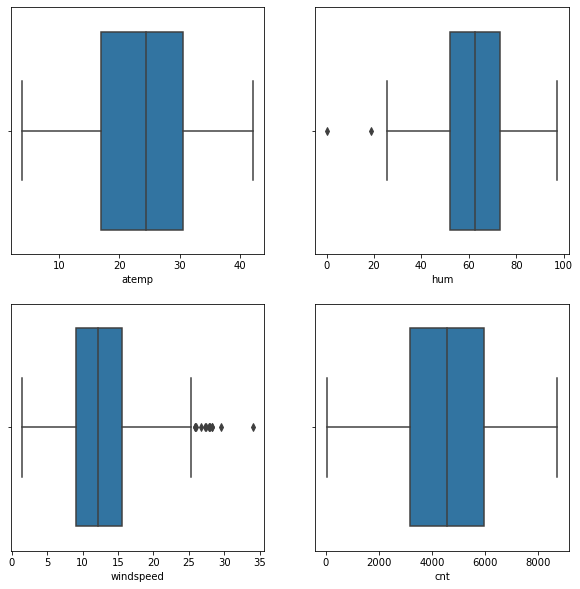

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(inp1['atemp'])

plt.subplot(222)
sns.boxplot(inp1['hum'])

plt.subplot(223)
sns.boxplot(inp1['windspeed'])

plt.subplot(224)
sns.boxplot(inp1['cnt'])

plt.show()

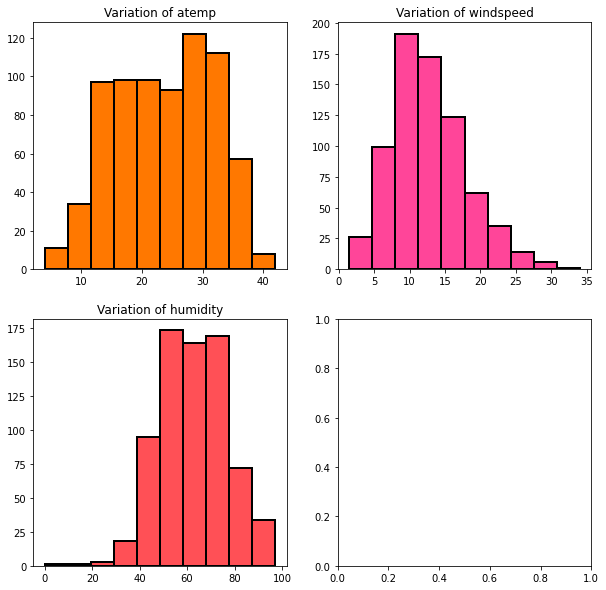

In [22]:
# can also be visulaized using histograms for all the continuous variables.
inp1.atemp.unique()
fig,axes=plt.subplots(2,2)

axes[0,0].hist(x="atemp",data=inp1,edgecolor="black",linewidth=2,color='#ff7800')
axes[0,0].set_title("Variation of atemp")
axes[0,1].hist(x="windspeed",data=inp1,edgecolor="black",linewidth=2,color='#ff4599')
axes[0,1].set_title("Variation of windspeed")
axes[1,0].hist(x="hum",data=inp1,edgecolor="black",linewidth=2,color='#ff5056')
axes[1,0].set_title("Variation of humidity")
fig.set_size_inches(10,10)

INFERENCES FROM THE ABOVE Histogram Plot --

Humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

also note that casual and working day are highly inversely related as you would expect.

Also note that count and holiday are highly inversely related as you would expect.

Also note that temp(or atemp) highly effects the count.

Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

similarly we can draw some more inferences like weather and humidity and so on

In [23]:
#In above graph, We can see Humidity is 0 in one of the case, Lets see what are the rows there.
inp1[inp1['hum']==0]


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
68,1,0,3,0,6,0,3,19.2834,0.0,17.545759,623


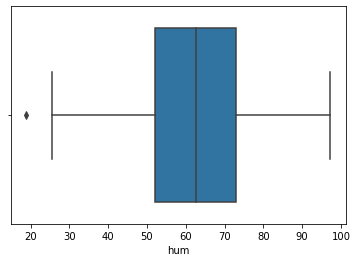

In [24]:
#Given the conditions of earth, Humidity can never be zero. Lets drop this row to ensure we normalise the humidity.
inp1=inp1[~(inp1['hum']==0)]
sns.boxplot(inp1['hum'])
plt.show()

In [25]:
inp1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


Creating Dummmy Variables for Columns Month,Season, WeatherSituation and Weekday

In [26]:
#Creating dummies for Season

dummies=pd.get_dummies(inp1['season'], drop_first = True)
for i in dummies.columns:
    inp1['season'+'_'+str(i)]=dummies[i]
inp1.drop(columns={'season'},inplace=True)

#Creating Dummies for Weekday

dummies=pd.get_dummies(inp1['weekday'],drop_first=True)
for i in dummies.columns:
    inp1['weekday'+'_'+str(i)]=dummies[i]
inp1.drop(columns={'weekday'},inplace=True)

#Creating Dummies for Weather Situation

dummies=pd.get_dummies(inp1['weathersit'],drop_first=True)
for i in dummies.columns:
    inp1['weathersit'+'_'+str(i)]=dummies[i]
inp1.drop(columns={'weathersit'},inplace=True)

#Creating Dummies for Month

dummies=pd.get_dummies(inp1['mnth'],drop_first=True)
for i in dummies.columns:
    inp1['mnth'+'_'+str(i)]=dummies[i]
inp1.drop(columns={'mnth'},inplace=True)


In [27]:
inp1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing fo Data

We will try to check if any of the patterns can be visually interpreted.Understanding the correlation, dependancies through univariate, Bivariate or multivariate analysis helps us understand the data better.We can identify whether any of the predictive features have association with the outcome variable and Determine multicollinearity.

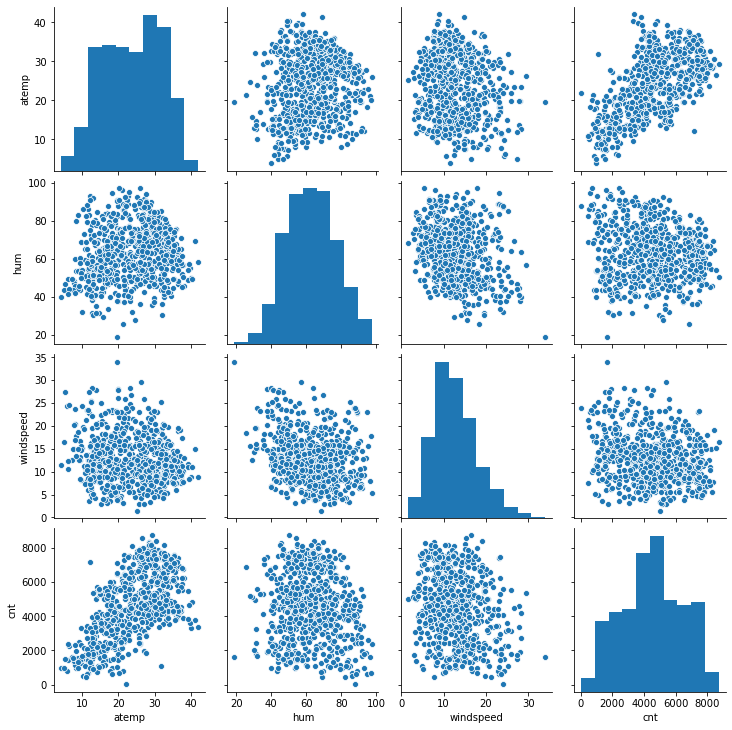

In [28]:
# Pair plots between numeric variables.
sns.pairplot(inp1[['atemp','hum','windspeed','cnt']])
plt.show()

Observation from Pair Plot:- 

Looking at the correlation between Count and Temperature, shows Higher temperatures lead to an increasing number of bike rents and lower temperatures decrease the number of rents.
For Humidity and Windspeed, Count seems to be distributed uniformly

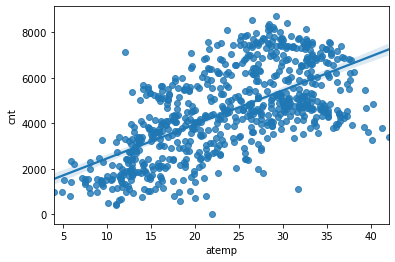

In [137]:
sns.regplot( x='atemp', y='cnt',data = inp1)
plt.show()

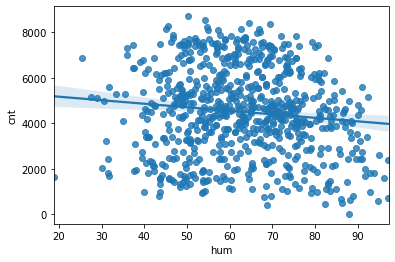

In [138]:
sns.regplot( x='hum', y='cnt',data = inp1)
plt.show()

Here we can see that the gradient line is descending a little indicating a negative slope and there is no particular pattren over here



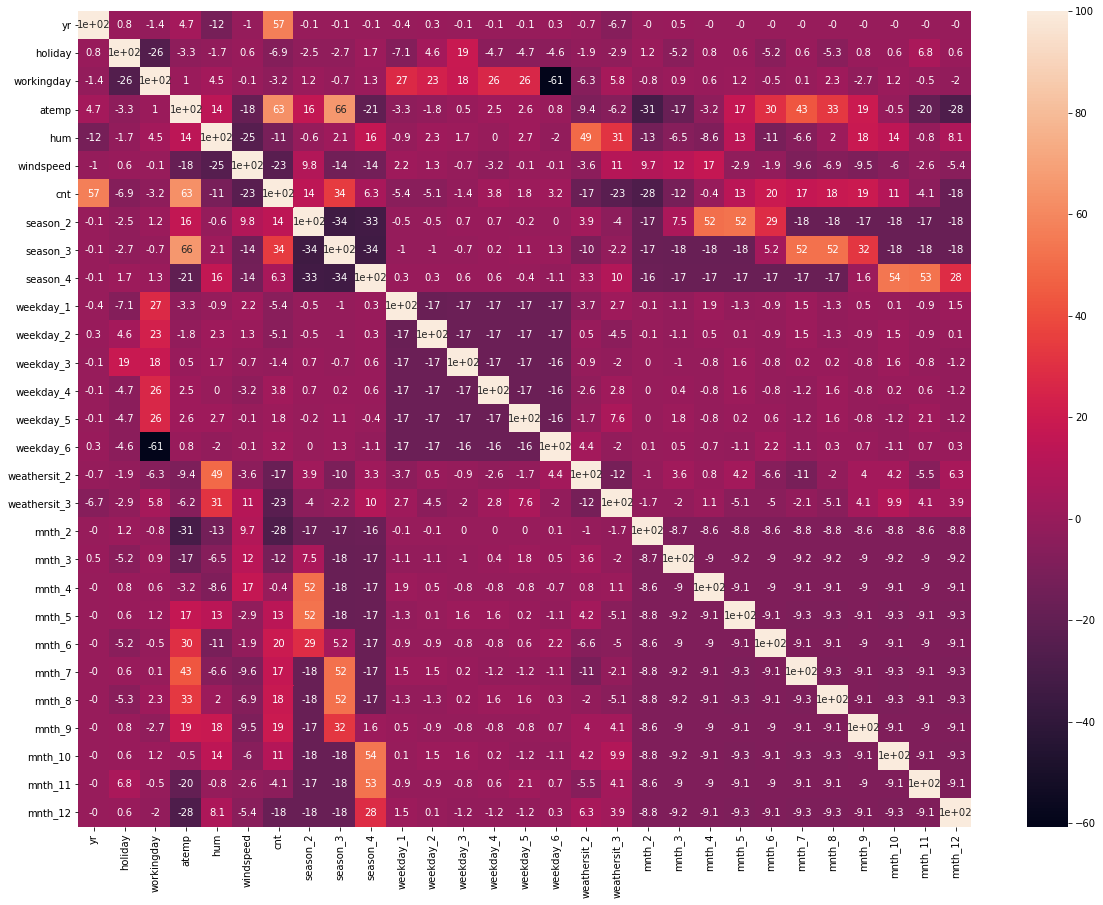

In [29]:
# We will check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 15))
sns.heatmap(round(inp1.corr()*100,1), annot = True)
plt.show()

Observations from Heatmap:

We can see high correlations between different seasons for different Months. For example, Season_4 is correlated with Months 10,11,12.
Temperature is correlated with Count of Bikes being rented.
Temperature is also correlated negatively for few months indicating lower temperature for those months and positively correlated for few months indicating higher temperatures
WorkingDay is negatively correlated to Weekday_6 which is Saturday
Different Weather Situations are correlated to Humidities.
Year is highly correlated with Count of bikes rented indicating 2019 has mode rented bikes than 2018.

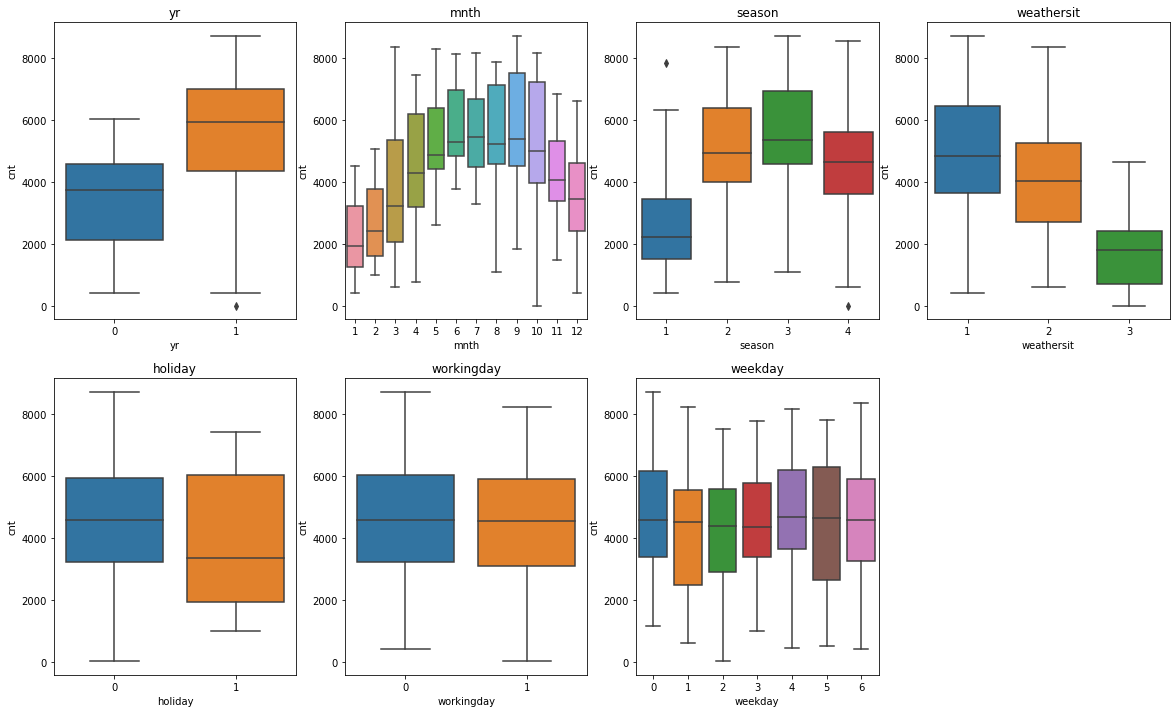

In [30]:
#Distribution of Categorical Variables
plt.figure(figsize=(20, 12))

features = ['yr','mnth','season','weathersit','holiday','workingday','weekday']

for i in enumerate(features):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = bike)
    plt.title(i[1])

Observations from Boxplots of Categorical variables

1. Count of Rented Bikes is higher in 2019 than 2018
2. Lower Bike rent counts have been observed at the start and end of the year while between June and October, they are the highest.
3. Season Summer(2) and Fall(3) seem more favourable for bike rentals.
4. Weather Situation 1 and 2 seem far more favourable for bike rentals than 3.
5. Median count of Bike rentals on Holiday is less than non holidays.
6. Working Day seems to have not much impact on counts. the data seems to have equal distribution.
7. All weekedays seem to have equal medians.

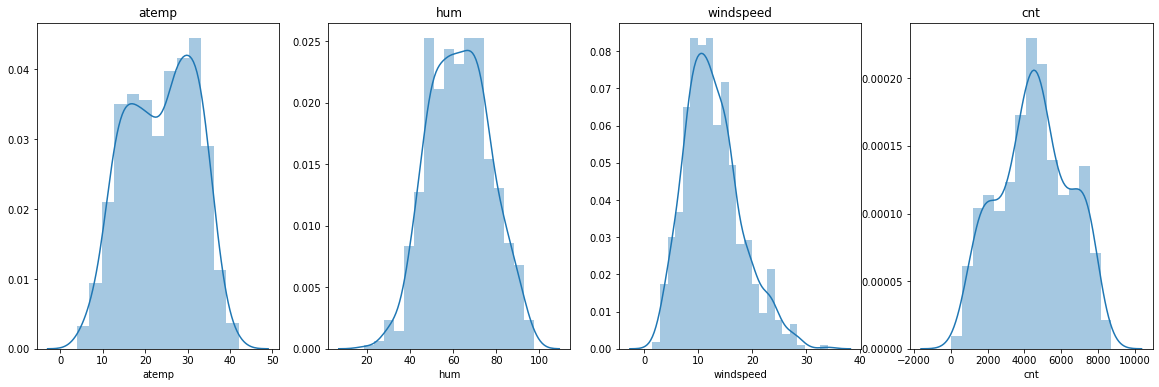

In [32]:
#Distribution of Numeric columns
plt.figure(figsize=(20, 6))

features = ['atemp','hum','windspeed','cnt']

for i in enumerate(features):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(inp1[i[1]])
    plt.title(i[1])
plt.show()


All the Numeric columns seem to have data normally distributed.

### NOW LET SEE HOW COUNT VARIES WITH DIFFERENT FEATURES.

In [35]:
y=inp1.cnt
X=inp1.drop('cnt',axis=1)

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [39]:
Scaler=MinMaxScaler()
obj=Scaler.fit(X_train[['atemp', 'hum','windspeed']])
X_train[['atemp', 'hum','windspeed']]=obj.transform(X_train[['atemp', 'hum','windspeed']])

In [40]:
#Scaling

Scaler=MinMaxScaler()
obj=Scaler.fit(X_train[['atemp', 'hum','windspeed']])
X_train[['atemp', 'hum','windspeed']]=obj.transform(X_train[['atemp', 'hum','windspeed']])

## Performing Simple Linear Regression

Equation of linear regression 𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 𝑦 is the response 𝑐 is the intercept 𝑚1 is the coefficient for the first feature 𝑚𝑛 is the coefficient for the nth feature In our case:


Recursive Feature Elimination - (automated approach)

In [44]:
from sklearn.feature_selection import RFE

In [45]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [46]:
RFE=pd.DataFrame()
RFE['Feature']=X_train.columns
RFE['support']=rfe.support_
RFE['ranking']=rfe.ranking_
RFE.sort_values('ranking')

,Feature,support,ranking
0,yr,True,1
15,weathersit_2,True,1
20,mnth_5,True,1
23,mnth_8,True,1
24,mnth_9,True,1
25,mnth_10,True,1
16,weathersit_3,True,1
8,season_4,True,1
6,season_2,True,1
5,windspeed,True,1


In [47]:
# Selecting top 15 features, assumed to be true

colmn=list(RFE[RFE['ranking']==1].Feature.reset_index(drop=True))
colmn


['yr',
 'holiday',
 'atemp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_2',
 'weathersit_3',
 'mnth_3',
 'mnth_5',
 'mnth_8',
 'mnth_9',
 'mnth_10']

Some Understanding regarding the Feature Selection

#### Two Main Charaters defining Feature Selections are:-

1. p-value
2. VIFs


#### p-value
Hypothesis testing is that a feature is insignificant in the model and by having p-value less than 0.05, we reject this hypothesis and hence the feature is selected. So wherever the p-value of a feature is higher than 0.05, it indicates that we failed to reject the hypothesis

#### VIFs

When there is a feature in the model that can be explained by other features, then the variable's VIF will be higher than 5 and we can eliminate those variables.

Strategies to Utilise:-

1. When a feature has high p-value and high VIF, then it can be dropped first.
2. When a feature has high p-value and low VIF, then we will drop it as it is not significant.
3. When a feature has low p-value and high VIF, we try to drop other features which have higher p-value and if there is none, we will remove this feature and build the model and check the R-squared.
4. When a feature has low p-value and low VIF, then it is significant and not explained by other features and hence we keep these features in the model.


In [48]:
X_train.columns[~rfe.support_]

Index(['workingday', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12'],
      dtype='object')

#### Model I:

In [66]:
Features=list(RFE[RFE['ranking']==1].Feature.reset_index(drop=True))
Features

['yr',
 'holiday',
 'atemp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_2',
 'weathersit_3',
 'mnth_3',
 'mnth_5',
 'mnth_8',
 'mnth_9',
 'mnth_10']

In [73]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [74]:
#Below are some functions that make further evaluation easy
def Model(Features):
    X_train_temp = X_train[Features] # get feature list 
    X_train_temp = sm.add_constant(X_train_temp) # required by statsmodels 
    lr = sm.OLS(y_train, X_train_temp).fit() # build model and learn coefficients
    print(lr.summary())
    vif(Features)   # OLS summary with R-squared, adjusted R-squared, p-value etc.

def vif(Features):
    vif = pd.DataFrame()
    vif['Features'] = X_train[Features].columns # Read the feature names
    vif['ViF'] = [variance_inflation_factor(X_train[Features].values,i) for i in range(X_train[Features].shape[1])] # calculate VIF
    vif['ViF'] = round(vif['ViF'],2)
    vif.sort_values(by='ViF', ascending = False, inplace=True)  
    print(vif.reset_index(drop=True)) # prints the calculated VIFs for all the features
    


In [75]:
Features1= Features.copy()
Model(Features1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.33e-186
Time:                        13:41:24   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1729.3195    199.613      8.663   

Model-1 with all features from RFE

In above Summary statistics,

All the features seem very significant with p-value being less than 0.05.
VIFs for few variables are very high which show collinearity.

#### Model II
In the model There is a significant dip in R-squared value.

Although we have removed Temperature which was had high VIF and shows high multicollinearity, During EDA, we have seen that temperature has high correlation with Count and explains good amount of variance. Dropping Temperature might not be a good Idea.

In [78]:
Features2=Features.copy()
Features2.remove('atemp')
Model(Features2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.41e-151
Time:                        13:45:42   Log-Likelihood:                -4204.2
No. Observations:                 510   AIC:                             8438.
Df Residuals:                     495   BIC:                             8502.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2526.6093    226.829     11.139   

#### Model III

Eliminating Humidity
As we dont see a huge dip in the R-squared or even Adj. R-squared values, we can omitt it to reach precision



In [92]:
Features3=Features.copy()
Features3.remove('hum')
Model(Features3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.04e-181
Time:                        13:55:50   Log-Likelihood:                -4131.7
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     495   BIC:                             8357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1018.4490    153.194      6.648   

#### Model IV

Removing season 3, as no such dip is occuring

In [93]:
Features4=Features3.copy()
Features4.remove('season_3')
Model(Features4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.38e-179
Time:                        13:55:55   Log-Likelihood:                -4139.5
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     496   BIC:                             8366.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          923.3481    153.426      6.018   

#### Model V

Removing Month 3, month 5 and month 10 step-wise as p-value is close to 0.062, 0.489 and 0.046 respectively. It is suitable for elimination

In [98]:
Features5=Features4.copy()
Features5.remove('mnth_3')
Model(Features5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.44e-180
Time:                        14:04:58   Log-Likelihood:                -4141.5
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     497   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          983.7362    150.721      6.527   

In [99]:
Features6 = Features5.copy()
Features6.remove('mnth_5')
Model(Features6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.62e-181
Time:                        14:04:59   Log-Likelihood:                -4141.6
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     498   BIC:                             8358.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          981.6228    150.492      6.523   

In [100]:
Features7 = Features6.copy()
Features7.remove('mnth_10')
Model(Features7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        14:05:20   Log-Likelihood:                -4143.6
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          950.0594    150.119      6.329   

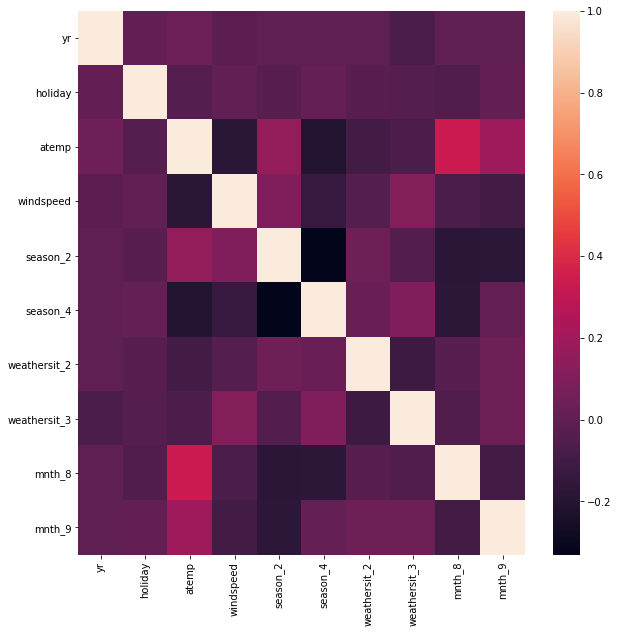

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(inp1[Features7].corr())
plt.show()


Finally after Feature Selection, we are left with 10 features:-
[Temperature, windspeed, year, season 2 and 4, weather situation 2 and 3, months 8 and 9 and Holiday]       
which explain the variance in the model by R-squared value of 82.5%.

This is our final Model.

In [107]:
X_train_final=X_train[Features7]
X_train_final = sm.add_constant(X_train_final) 
lr=sm.OLS(y_train,X_train_final).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        14:20:57   Log-Likelihood:                -4143.6
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          950.0594    150.119      6.329   

## Interpreting the Train data set

In [109]:
#Scaling y For better Interpretation after we get final features
y_train_scaled=pd.DataFrame(y_train)
scaler_y = MinMaxScaler()
scaled_array = scaler_y.fit_transform(y_train_scaled)
y_train_scaled=pd.DataFrame(scaled_array,columns=['cnt'])
X_train_final=X_train[Features7]
X_train_final = sm.add_constant(X_train_final) 
lr=sm.OLS(y_train_scaled.cnt.values.reshape(-1,1),X_train_final).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        14:42:27   Log-Likelihood:                 457.60
No. Observations:                 510   AIC:                            -893.2
Df Residuals:                     499   BIC:                            -846.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0627      0.018      3.458   

##### Observations about the Models

R-squared of the model(82.0%) and adjusted R-squared(82.5%) indicate that the selected 10 features are significant for prediction.
P(F-statistic) of the model is close to 0 which indicates that this model is a good fit.
Coefficients of the features indicate how they are related with cnt.
Top 3 significant features that contribute towards explaining towards the demand of the shared bikes:

Temperature with coefficient 0.57 indicating as temperature increases, the demand for bikes increase.
Weather situation 3 ie. (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) with coefficient -0.26, indicating less demand for bikes during these conditions.
Year with coefficient 0.2402 indicating that the bike demand has increased from last year and is expected to increase in future.

## To get The Best Fit Line Equation using these 10 Features for Train Dataset

In [110]:
X_train_final=X_train[Features7]
X_train_final = sm.add_constant(X_train_final) 
lr=sm.OLS(y_train,X_train_final).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        14:49:13   Log-Likelihood:                -4143.6
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          950.0594    150.119      6.329   

#### Model Evaluation of Train Dataset

Assumptions of Linear Regression:

Linear relationship between X and Y: This was proved in the pair plot
Error terms are normally distributed
Error terms are independent of each other
Error terms have constant variance (homoscedasticity)

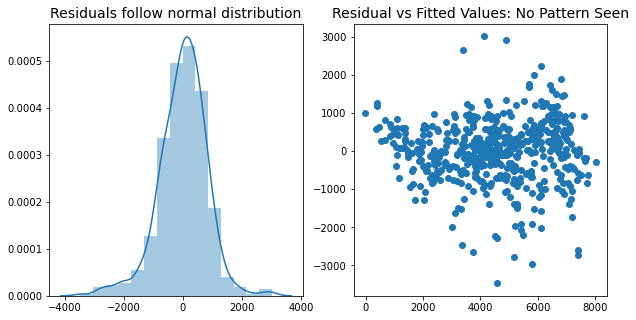

In [115]:
y_train_predicted = lr.predict(X_train_final) # get predicted value on training dataset using statsmodels predict()
residual_values = y_train - y_train_predicted # difference in actual Y and predicted value
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(residual_values, bins = 15) # Plot the histogram of the error terms
plt.title('Residuals follow normal distribution', fontsize = 14)
plt.subplot(122) 
plt.scatter(y_train_predicted, residual_values) # Residual vs Fitted Values
plt.plot([0,0],'r') # draw line at 0,0 to show that residuals have constant variance
plt.title('Residual vs Fitted Values: No Pattern Seen' , fontsize = 14)
plt.show()


From first plot, it can be proved that Residuals follow normal distribution and centered around zero
From second plot, it can be proved that Residuals do not follow any pattern indicating error terms are independent
Also from second plot, we can see that Error terms have constant variance and do not exhibit Heteroskedasticity

#### Root mean square error ( RMSE )

In [116]:
from math import sqrt
train_rmse = sqrt(mean_squared_error(y_train,y_train_predicted))
print('Root mean square error :',train_rmse)


Root mean square error : 817.1076482232538


In [117]:
train_mae=mean_absolute_error(y_train,y_train_predicted)
print('Mean absolute error :',train_mae)


Mean absolute error : 609.4397178984229


#### R-squared and Ajd. R-squared values

In [119]:
train_r2 = round(r2_score(y_train, y_train_predicted),3)
print('R2 Score :',train_r2)

n = X_train_final.shape[0]
p = len(Features7)
train_Adj_R2=round(1-(1-train_r2)*(n-1)/(n-p-1),3) 
print('Adjusted R2 Score:',train_Adj_R2)

R2 Score : 0.825
Adjusted R2 Score: 0.821


## Working over Test Data Set


Scaling

In [120]:
#Scaling the Test Dataset using Object used while Scaling Train Dataset
X_test[['atemp', 'hum','windspeed']]=obj.transform(X_test[['atemp', 'hum','windspeed']])

In [122]:
#Selecting The final 10 Features
X_test_final=X_test[Features7]

X_test_final = sm.add_constant(X_test_final)
y_test_predicted = lr.predict(X_test_final)

## Comparing Test and Train data set for better understanding

R-squared scores

In [123]:
train_r2 = round(r2_score(y_train, y_train_predicted),3)
test_r2 = round(r2_score(y_test, y_test_predicted),3)
print('R2 Score of Train and Test Datasets are:',train_r2,' and ',test_r2)

R2 Score of Train and Test Datasets are: 0.825  and  -3243.386


Adj. R squared scores

In [124]:
n = X_test_final.shape[0]
p = len(Features7)
test_Adj_R2=round(1-(1-test_r2)*(n-1)/(n-p-1),3) 
print('Adjusted R2 Score of Train and Test Datasets are:',train_Adj_R2,' and ',test_Adj_R2)

Adjusted R2 Score of Train and Test Datasets are: 0.821  and  -3399.366


Text(0, 0.5, 'y_test_predicted')

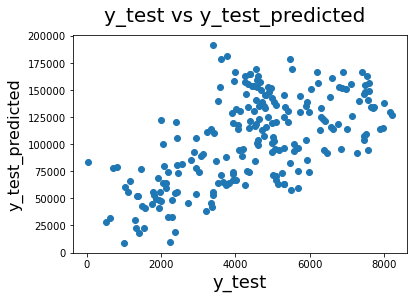

In [135]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_predicted)
fig.suptitle('y_test vs y_test_predicted', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_predicted', fontsize=16)                          # Y-label

# Conclusion

For the market, Data suggests the following remarks on demand of rental bikes:

1. Year by Year, The demand for rental bikes is increasing which is a good sign for the market.
2. People dont really prefer using Rental bikes on Holidays, So discounts or offers for people to use rental bikes on Holidays can be used to attract more customers.
3. People prefer using rental bikes during higher temperatures. So, measures should be taken to attract customers during days with lower temperatures.
4. With higher windspeed, customers tend to ignore rental bikes.
5. Summer and Winter seasons have been preferred by customers to use rental bikes
6. Weather Situations like Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds are impacting the rental bike count and the profit margin.
7. September has been found as the month in which customers are likely to use rental bikes more.